# Exercício 2

In [2]:
import plotnine as p
from plotnine import *
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("murders.csv")
data

,state,abb,region,population,total
0,Alabama,AL,South,4779736,135
1,Alaska,AK,West,710231,19
2,Arizona,AZ,West,6392017,232
3,Arkansas,AR,South,2915918,93
4,California,CA,West,37253956,1257
5,Colorado,CO,West,5029196,65
6,Connecticut,CT,Northeast,3574097,97
7,Delaware,DE,South,897934,38
8,District of Columbia,DC,South,601723,99
9,Florida,FL,South,19687653,669


In [4]:
p = ggplot(data)
type(p)

plotnine.ggplot.ggplot

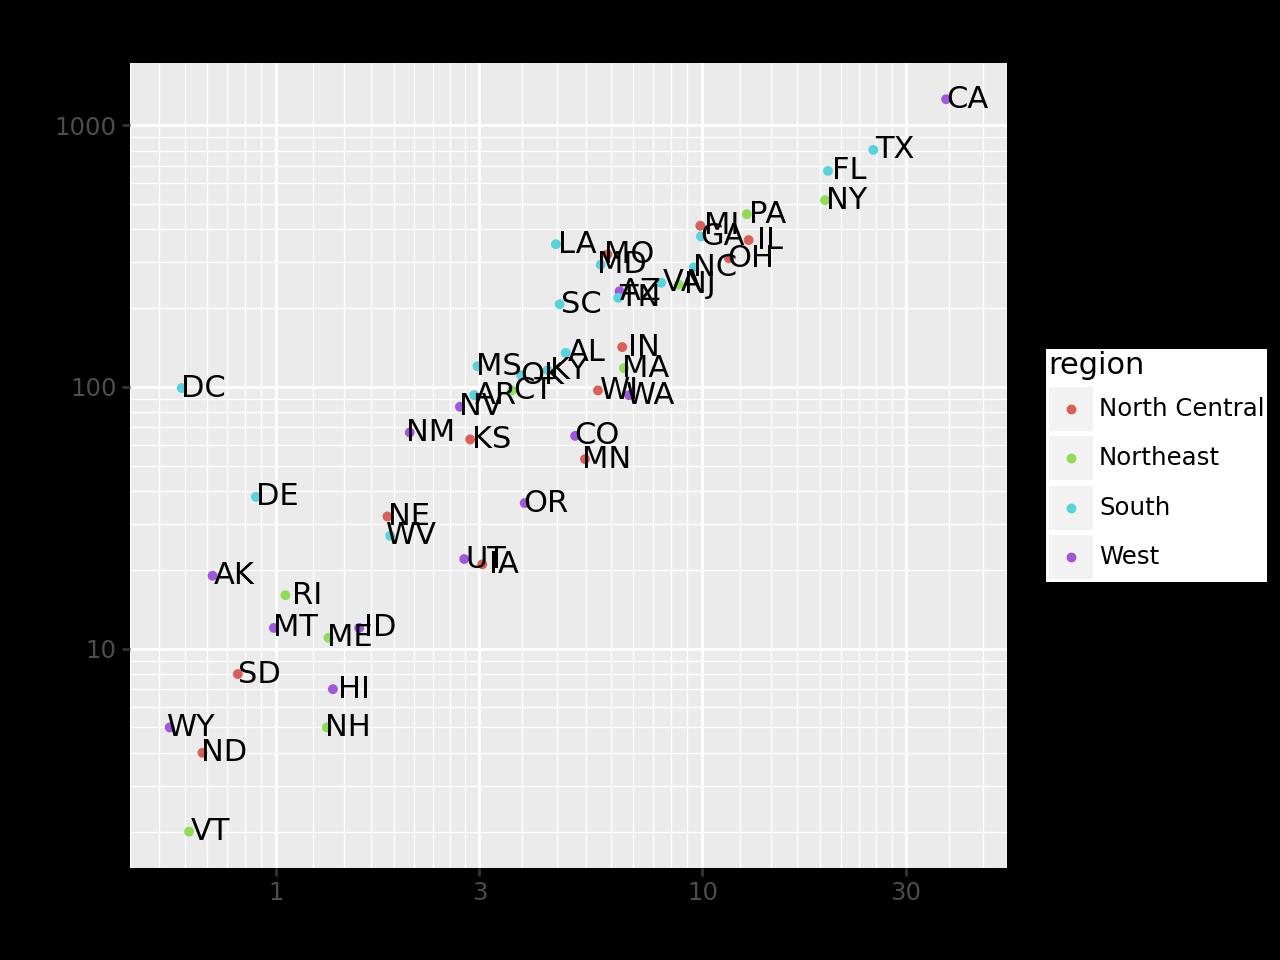

In [5]:
from cmath import log10
p = ggplot(data)
p = p+ geom_point(aes(x=data["population"] / 1e6, y="total", color="region"), size=1)
p = p+ geom_text(aes(data["population"]/1e6, "total", label = "abb"), nudge_x = 0.05)
p = p+ scale_x_log10() + scale_y_log10() 
p = p+ xlab("Populations in millions (log scale)") + ylab("Total number of murders (log scale)") + ggtitle("US Gun Murders in 2010")
p

In [6]:
data[['rate']] = (data["total"].sum() / data["population"].sum()) * 10 ** 6
r = data[['rate']]


In [7]:
linear_r = np.log10(r)
linear_r
type(linear_r)

pandas.core.frame.DataFrame

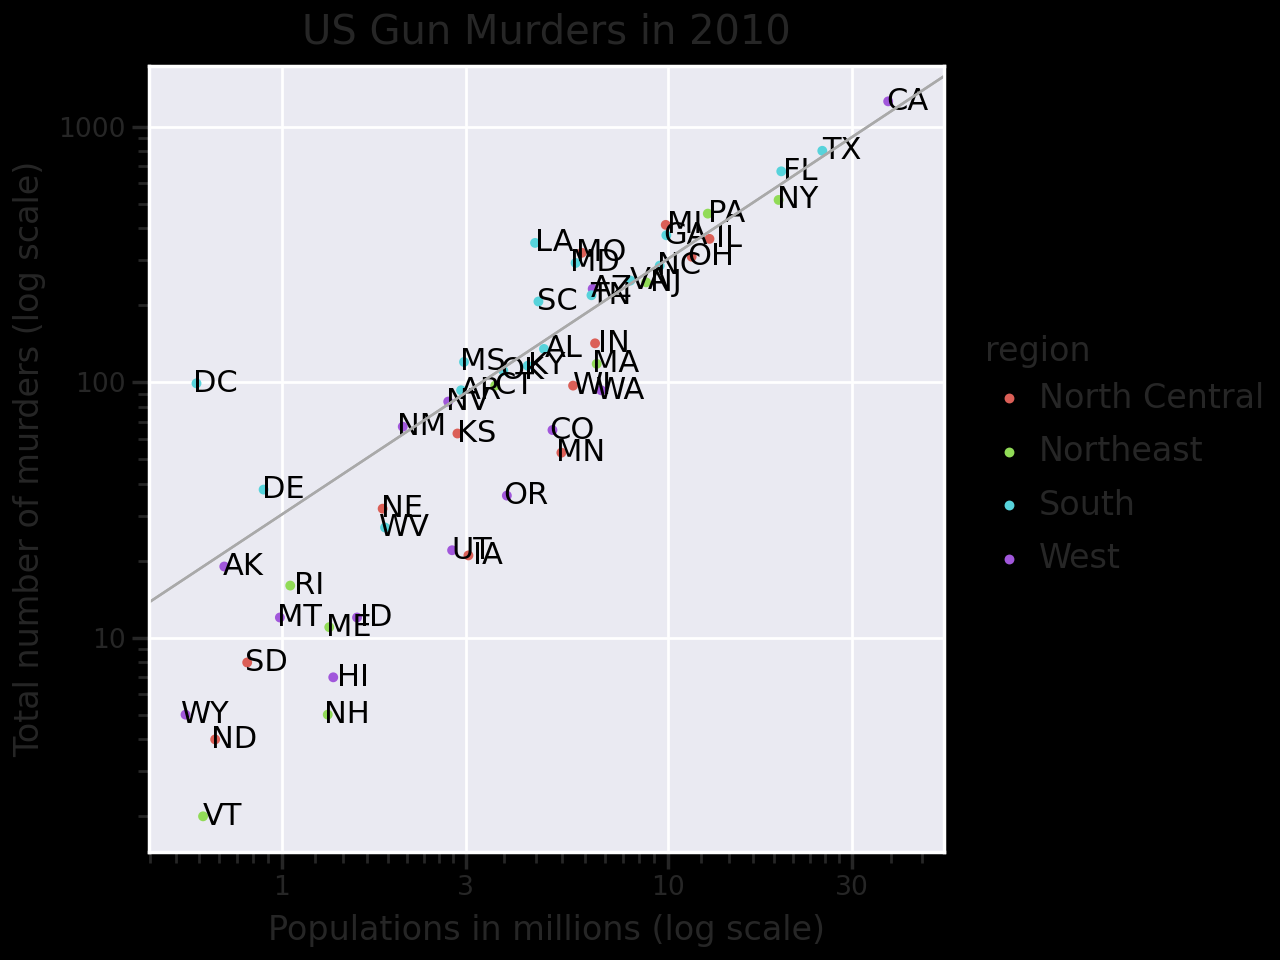

In [108]:
p = p+ geom_abline(intercept = linear_r, color = "darkgray")
p = p+ theme_seaborn()
plot1 = p
plot1

## 2.2

In [9]:
diamonds = pd.read_csv("diamonds.csv")
diamonds

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [10]:
ideal = diamonds[diamonds["cut"] == "Ideal"]
premium = diamonds[diamonds["cut"] == "Premium"]
premium

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
12,13,0.22,Premium,F,SI1,60.4,61.0,342,3.88,3.84,2.33
14,15,0.20,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27
15,16,0.32,Premium,E,I1,60.9,58.0,345,4.38,4.42,2.68
...,...,...,...,...,...,...,...,...,...,...,...
53928,53929,0.79,Premium,E,SI2,61.4,58.0,2756,6.03,5.96,3.68
53930,53931,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53931,53932,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43
53934,53935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58


In [11]:
algebra = diamonds[["carat","cut","price"]]
algebra

,carat,cut,price
0,0.23,Ideal,326
1,0.21,Premium,326
2,0.23,Good,327
3,0.29,Premium,334
4,0.31,Good,335
...,...,...,...
53935,0.72,Ideal,2757
53936,0.72,Good,2757
53937,0.70,Very Good,2757
53938,0.86,Premium,2757


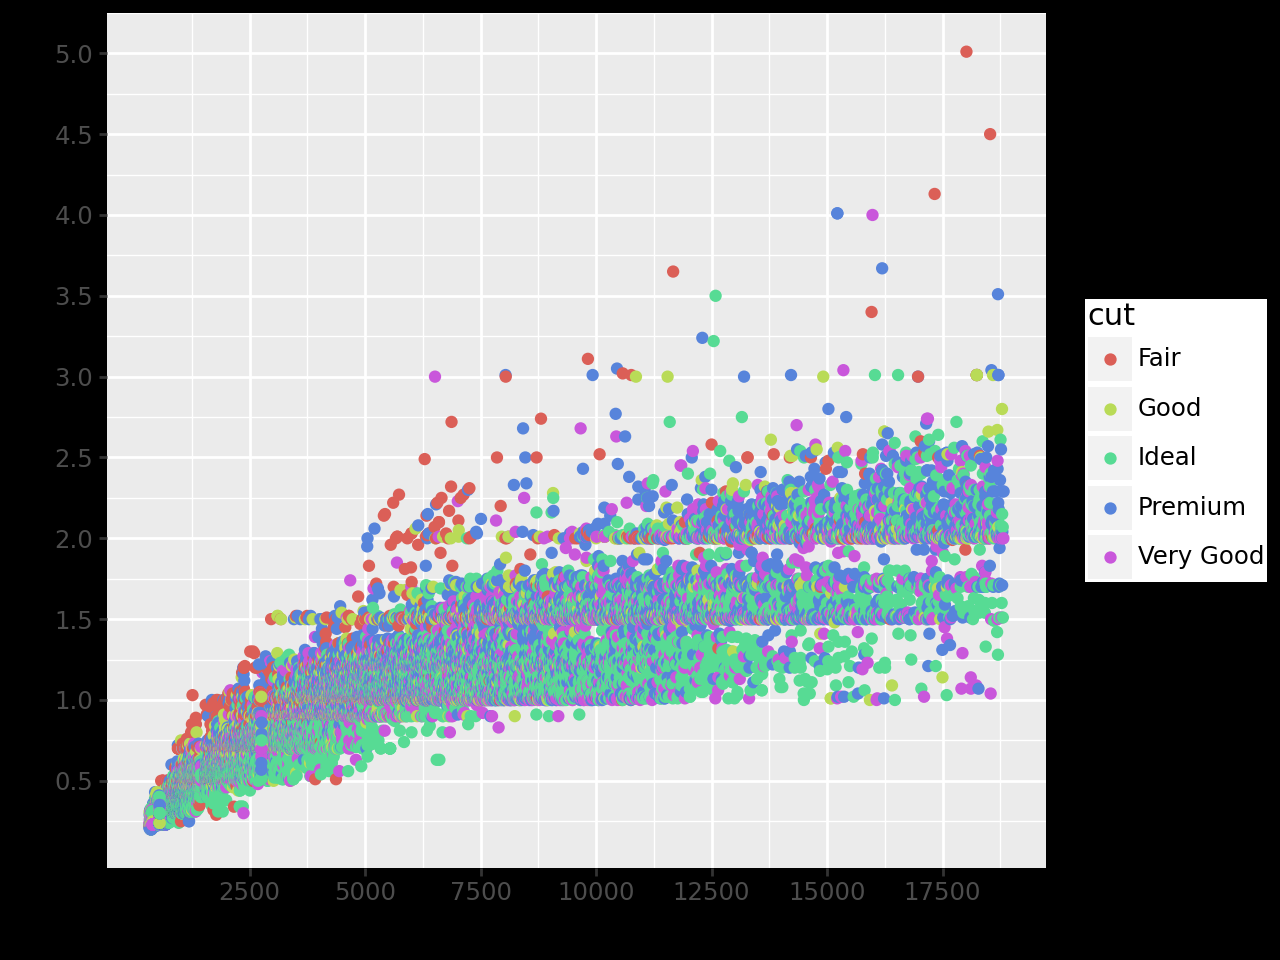

In [12]:
breaks1 = np.arange(2500, 17501, 2500)
breaks2 = np.arange(0.5, 5.1, 0.5)

diamonds_plot = ggplot(algebra)
diamonds_plot += geom_point (aes(x="price",y="carat",color="cut"))  
diamonds_plot += scale_x_continuous (breaks = breaks1)
diamonds_plot += scale_y_continuous (breaks = breaks2)
diamonds_plot

In [13]:
print("u_carat =", algebra["carat"].mean())
print("sd_carat =", algebra["carat"].std())
print("Md_carat =", algebra["carat"].median())

print("u_price = U$", algebra["price"].mean())
print("sd_price = U$", algebra["price"].std())
print("Md_price = u$", algebra["price"].median())

u_carat = 0.7979397478680014
sd_carat = 0.47401124440538067
Md_carat = 0.7
u_price = U$ 3932.799721913237
sd_price = U$ 3989.4397381463023
Md_price = u$ 2401.0


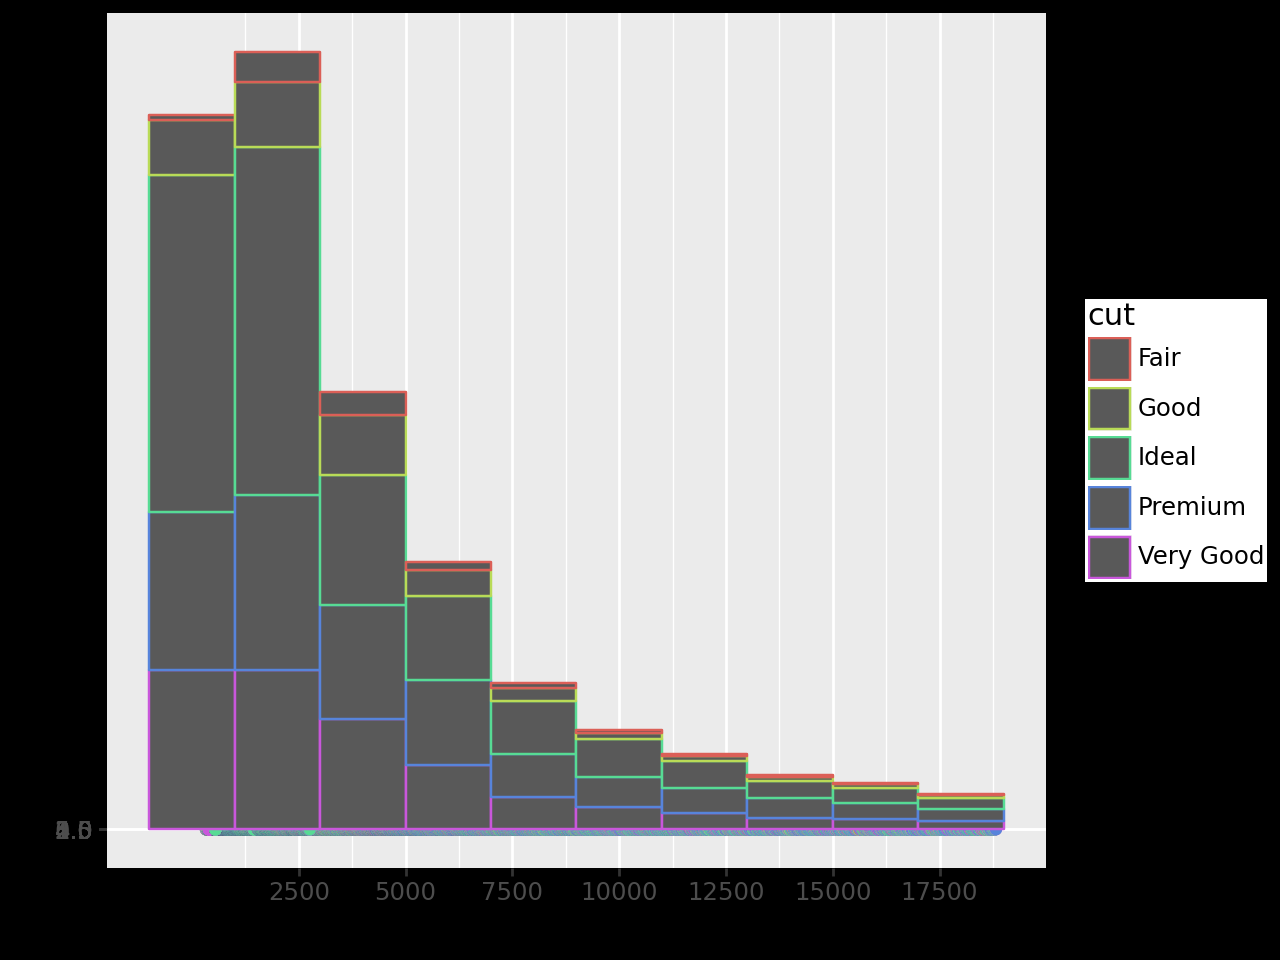

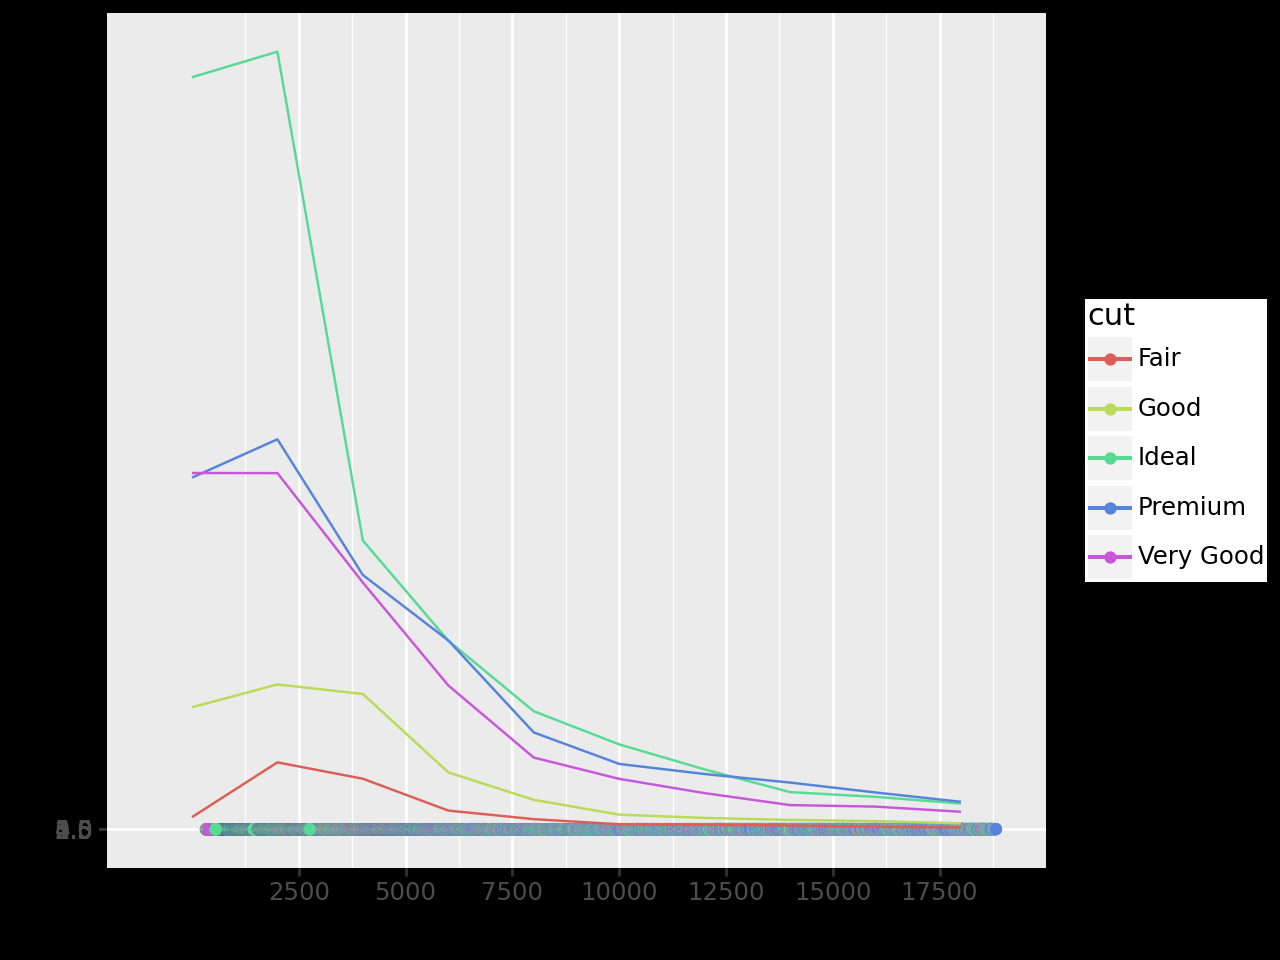

In [14]:
diamonds_plot_histogram = diamonds_plot+ geom_histogram(aes(x="price", color="cut"), binwidth=2000)
diamonds_plot_freqpoly = diamonds_plot + geom_freqpoly(aes(x="price", color="cut"), binwidth=2000)
diamonds_plot_histogram.show() 
diamonds_plot_freqpoly.show()


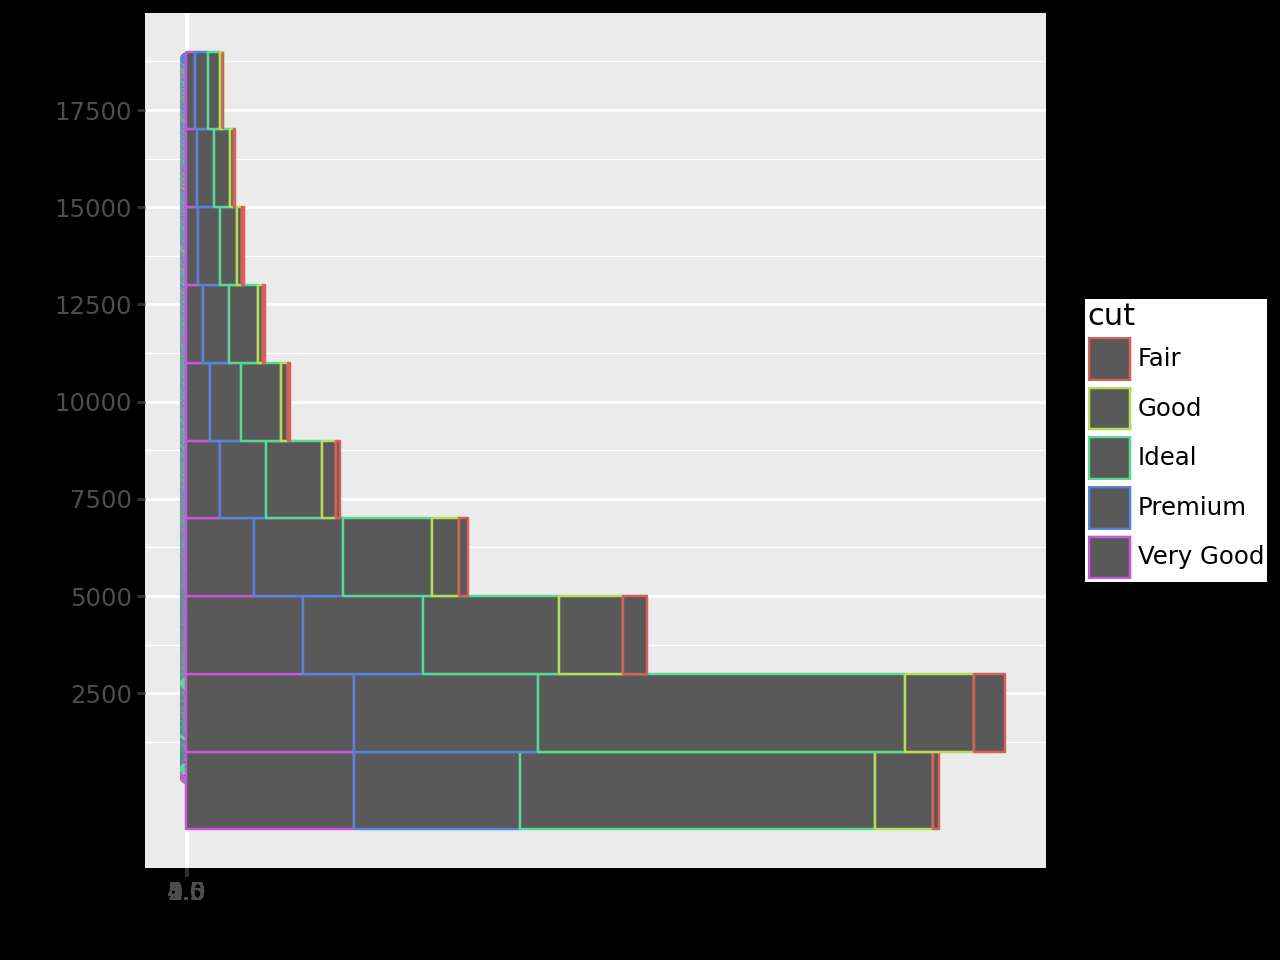

In [15]:
(diamonds_plot_histogram+coord_flip()).show()
# (diamonds_plot_histogram+coord_polar()).show()

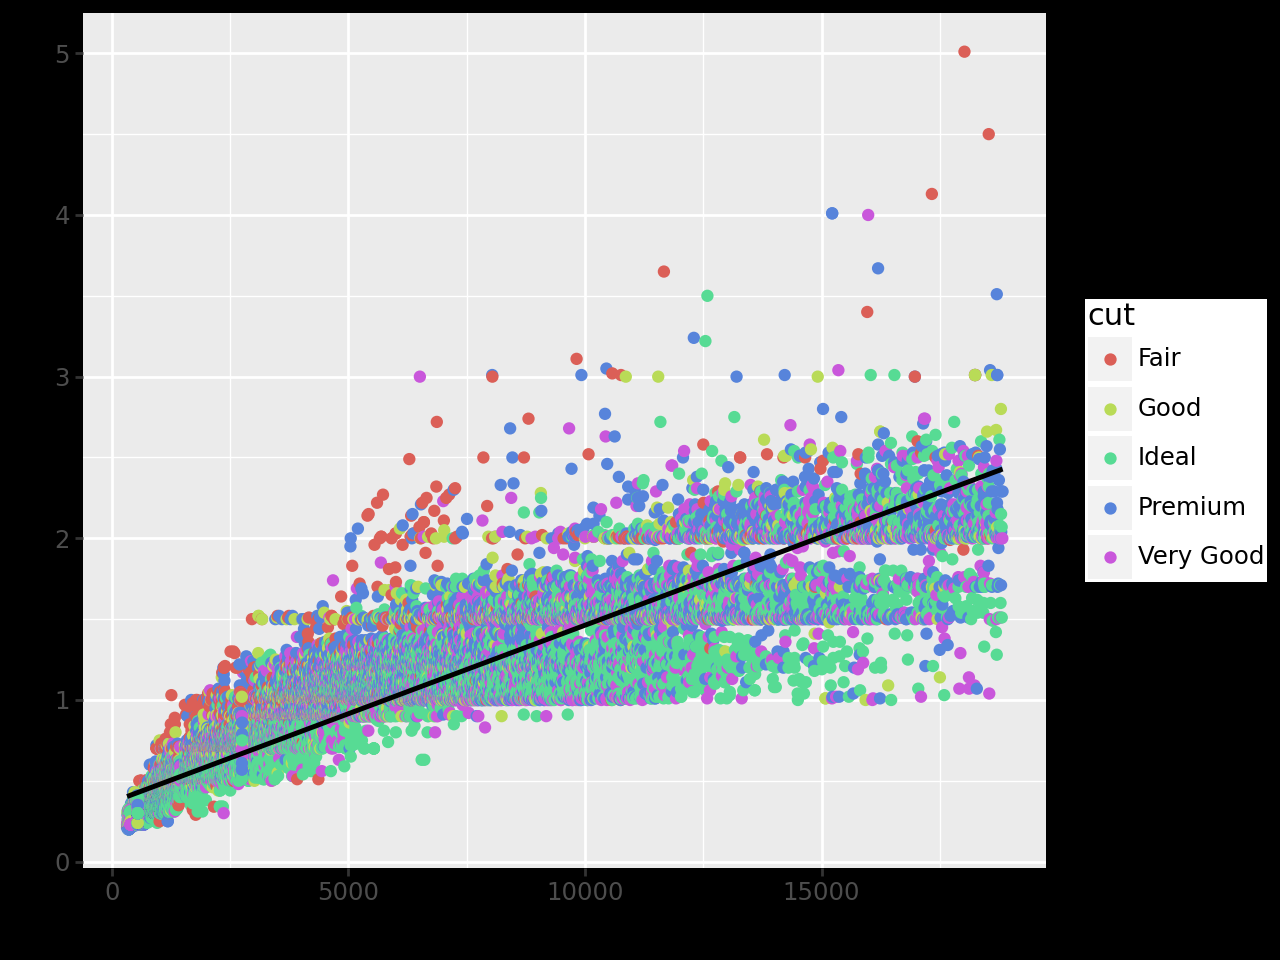

In [16]:
ggplot(algebra, aes(x="price",y="carat")) + \
geom_point(mapping = aes(color="cut")) + \
geom_smooth(method = "lm", se = False)

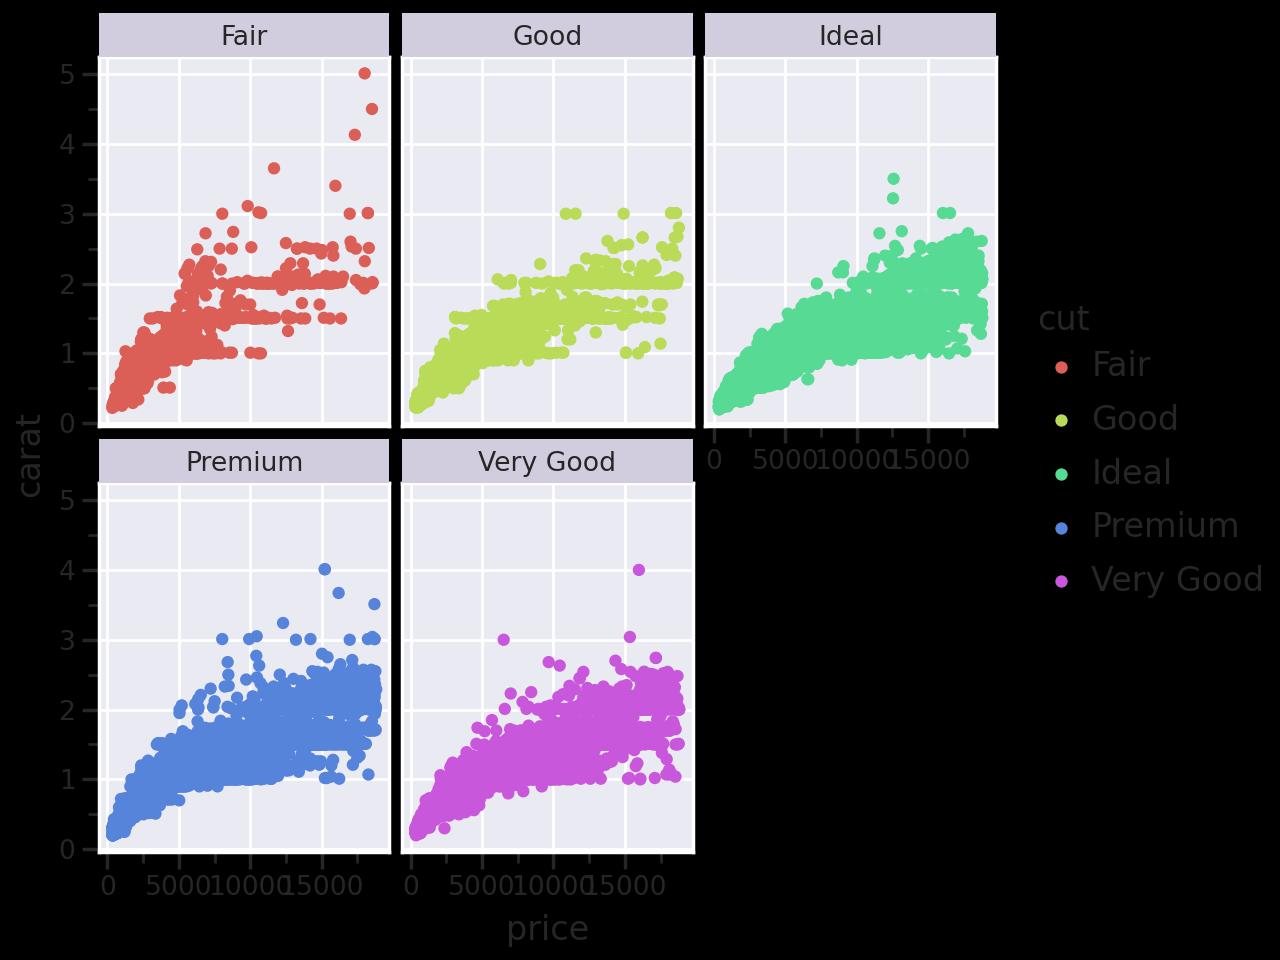

In [107]:
plot2 =ggplot(algebra, aes(x="price",y="carat", color="cut")) + \
geom_point () + \
facet_wrap ("~cut", nrow=2) + theme_seaborn()
plot2

## 2.3
caso 1 da Seção 10.1 na referência [34]

Para poder utilizar o dataset gapminder é necessário instalção pelo pip como um pacote python.

In [18]:
# !pip install gapminder
from gapminder import gapminder

- Verificar as características carregadas:

In [19]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [20]:
gapminder_data = gapminder
gapminder_data = gapminder_data[(gapminder_data["year"] == 2007) & ((gapminder_data["country"] == "Turkey") | (gapminder_data["country"] == "Sri Lanka"))]
gapminder_data[["country","lifeExp"]]

,country,lifeExp
1439,Sri Lanka,72.396
1583,Turkey,71.777


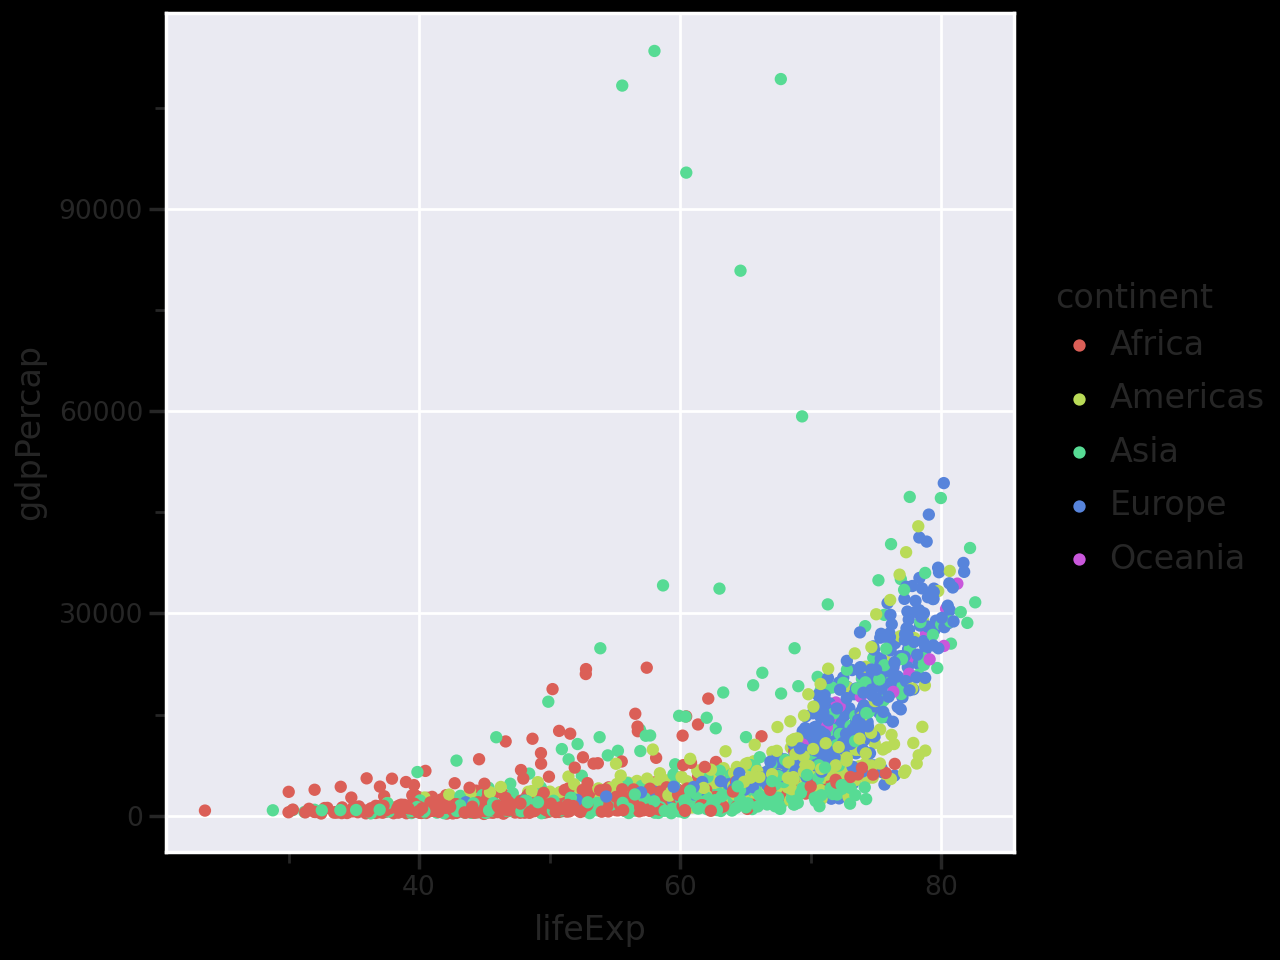

In [21]:
gapminder_data = gapminder
# ggplot(algebra, aes(x="price",y="carat"))
gapminder_plot = ggplot(gapminder_data, aes(x="lifeExp", y="gdpPercap", color = "continent")) + theme_seaborn()
gapminder_plot += geom_point()
gapminder_plot

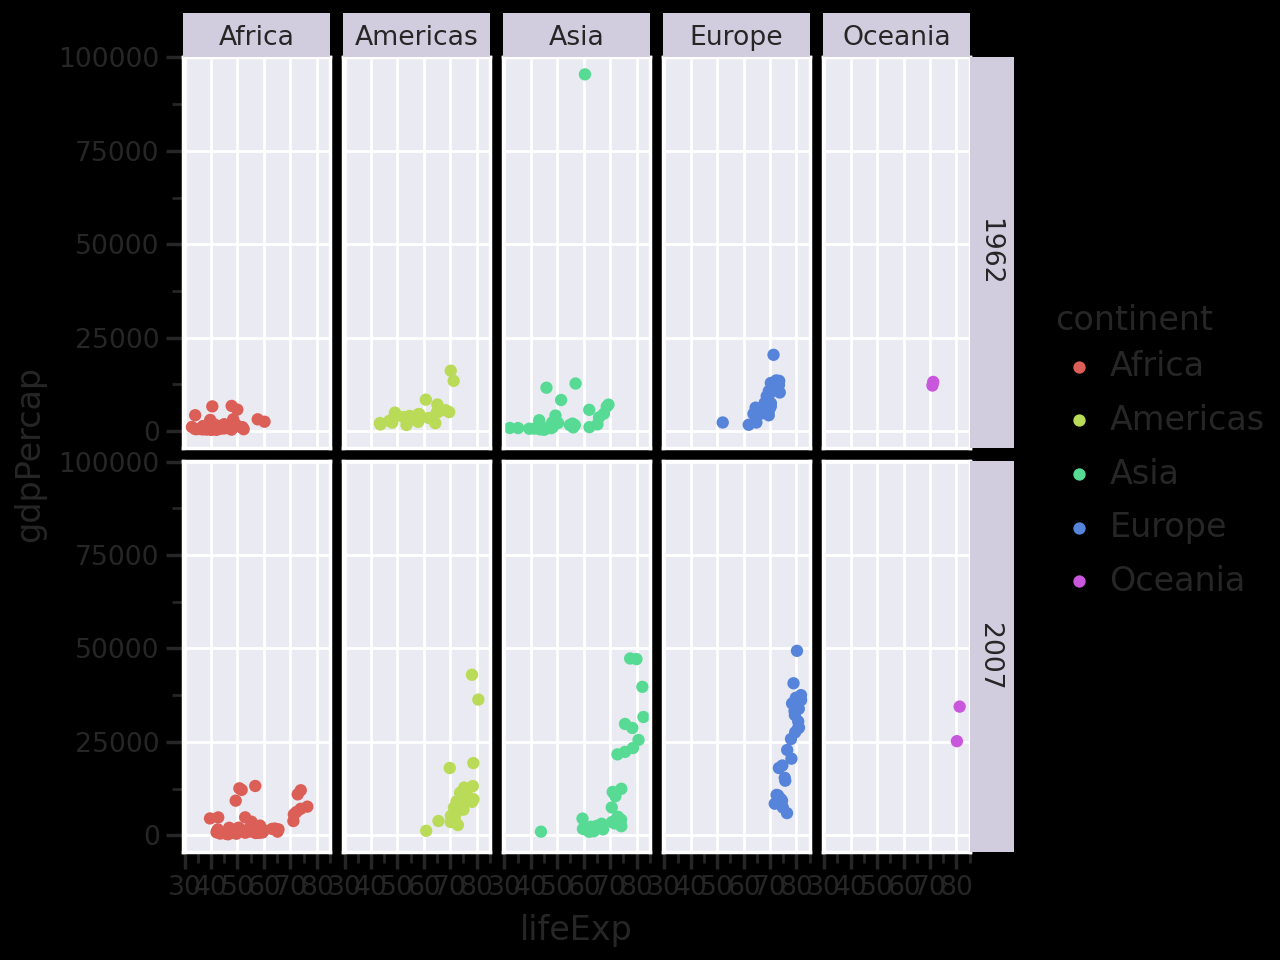

In [22]:
gapminder_data = gapminder_data[(gapminder_data["year"] == 1962) | (gapminder_data["year"] == 2007)]
gapminder_plot = ggplot(gapminder_data, aes(x="lifeExp", y="gdpPercap", color = "continent")) + theme_seaborn()
gapminder_plot += geom_point()
gapminder_plot += facet_grid("year~continent")
gapminder_plot

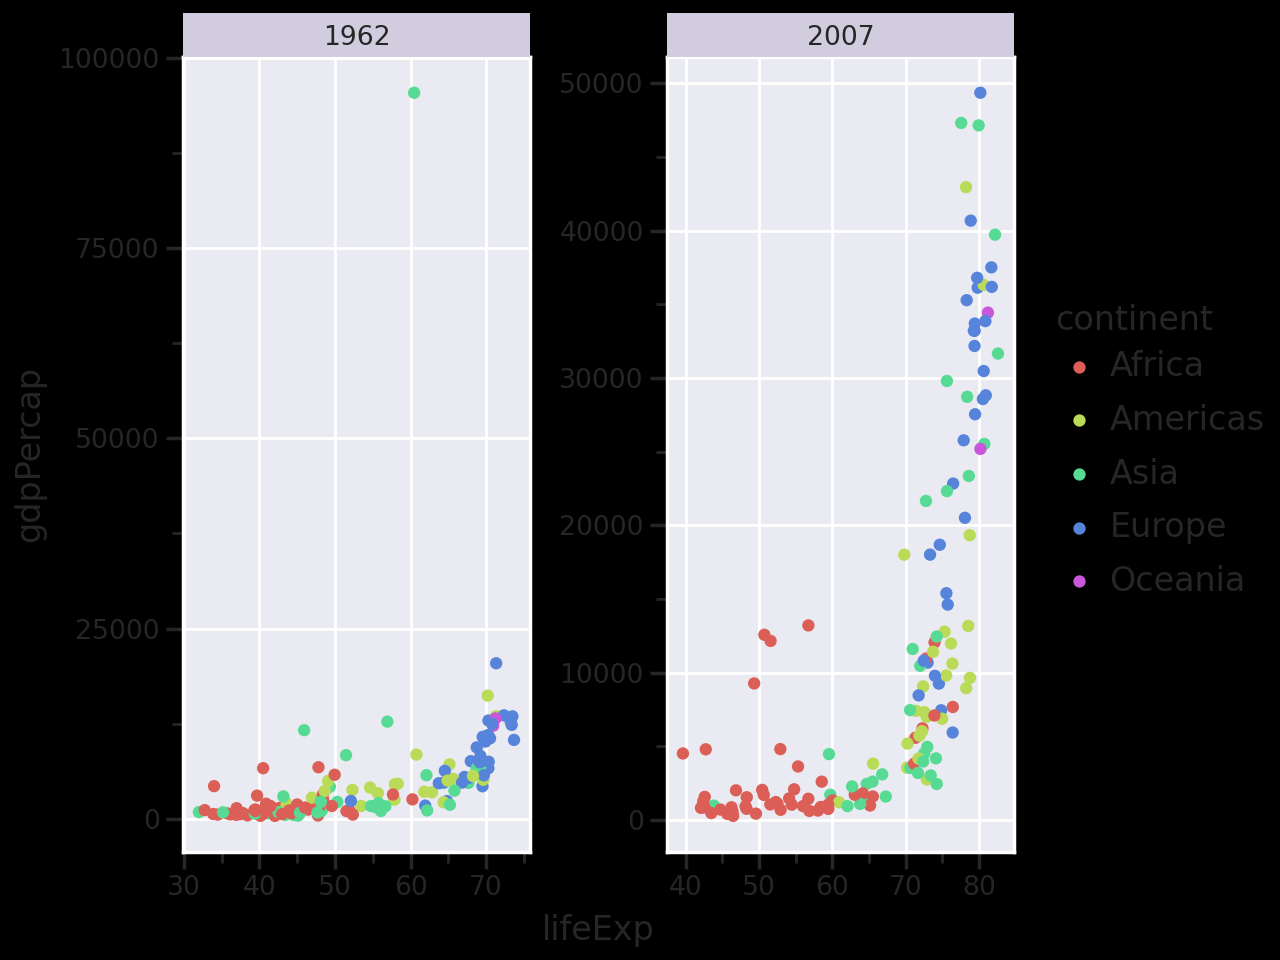

In [23]:
gapminder_plot += facet_wrap("~year", scales="free")
gapminder_plot

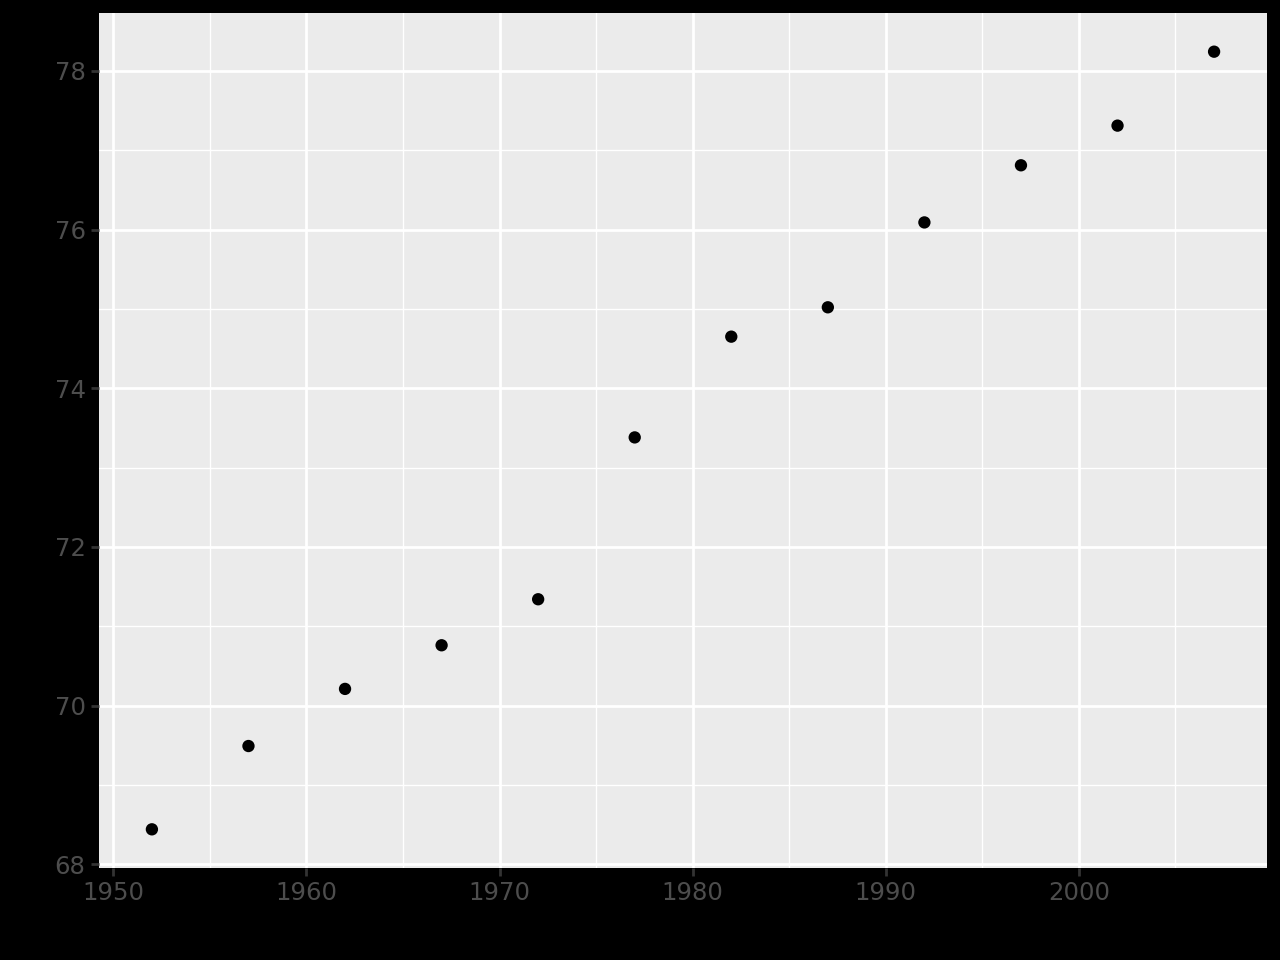

In [24]:
gapminder_data = gapminder
gapminder_data = gapminder_data[gapminder_data["country"] == "United States"]
gapminder_plot = ggplot(gapminder_data,aes(x="year",y="lifeExp"))
gapminder_plot += geom_point()
gapminder_plot

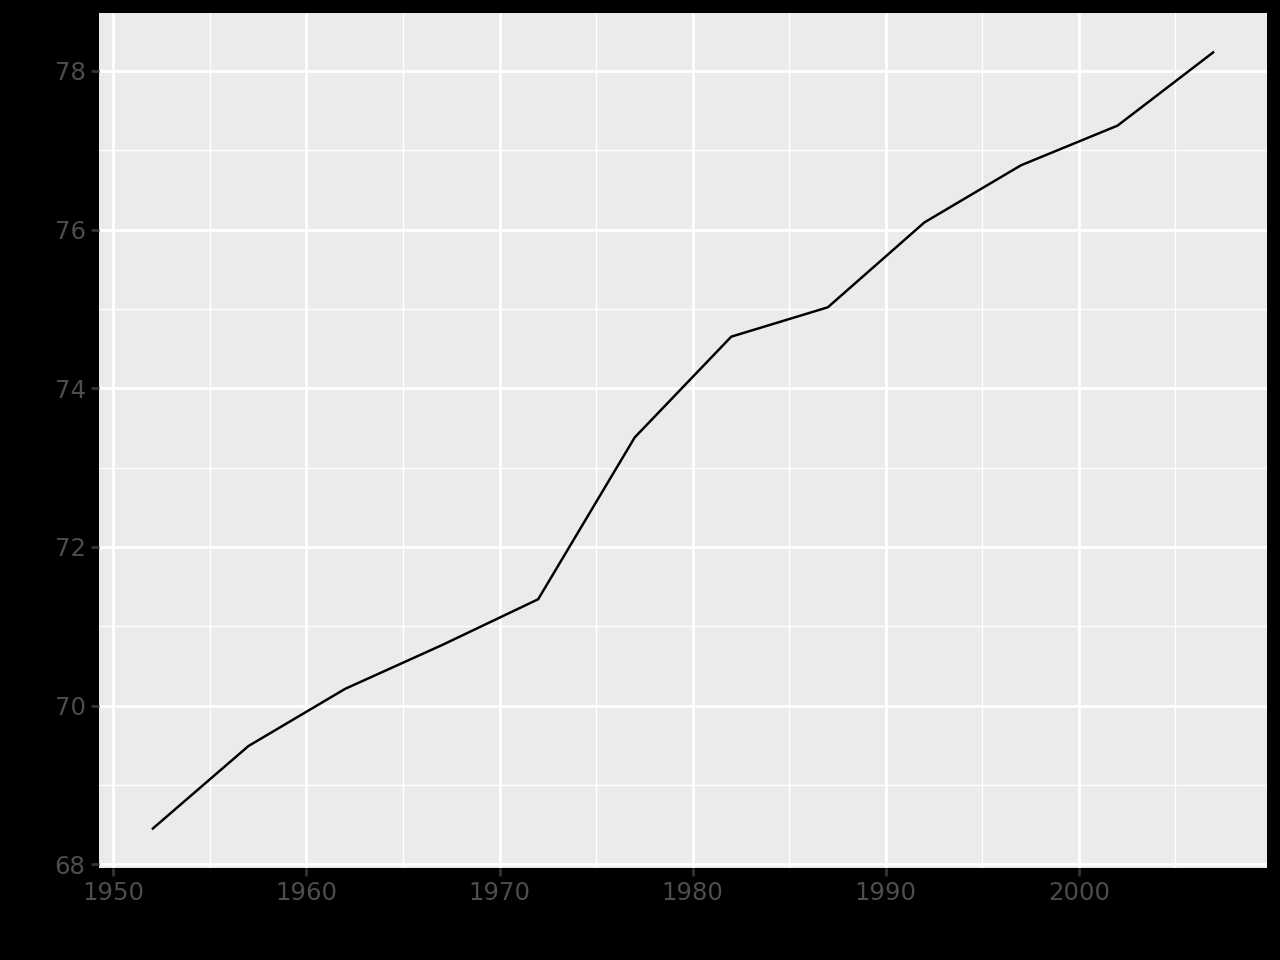

In [25]:
gapminder_data = gapminder
gapminder_data = gapminder_data[gapminder_data["country"] == "United States"]
gapminder_plot = ggplot(gapminder_data,aes(x="year",y="lifeExp"))
gapminder_plot += geom_line()
gapminder_plot

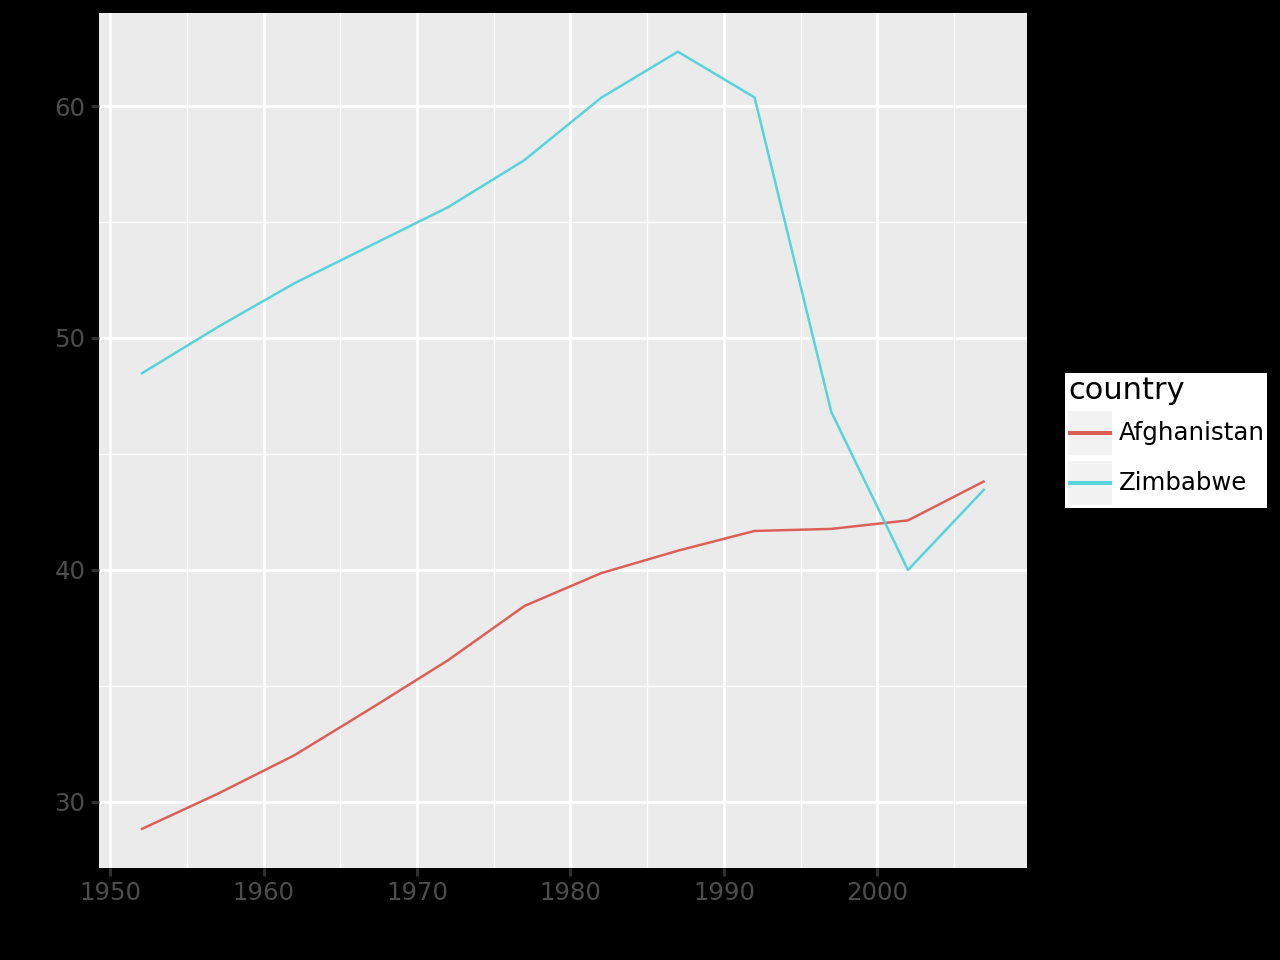

In [26]:
gapminder_data = gapminder
gapminder_data = gapminder_data[(gapminder_data["country"] == "Zimbabwe") | (gapminder_data["country"] == "Afghanistan")]
gapminder_plot = ggplot(gapminder_data,aes(x="year",y="lifeExp", color="country"))
gapminder_plot += geom_line()
gapminder_plot

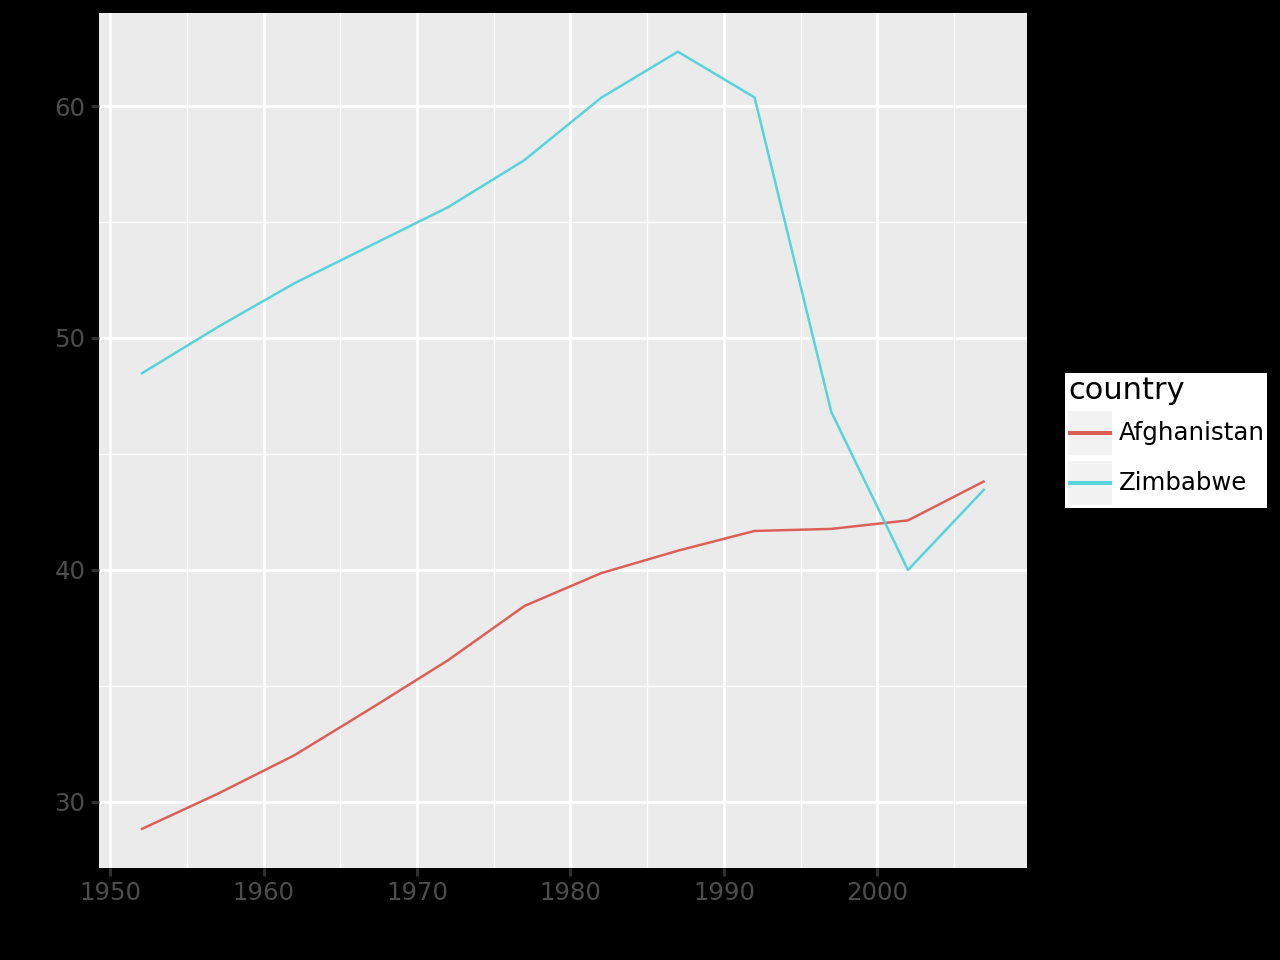

In [105]:
gapminder_data = gapminder
gapminder_data = gapminder_data[(gapminder_data["country"] == "Zimbabwe") | (gapminder_data["country"] == "Afghanistan")]
gapminder_plot = ggplot(gapminder_data,aes(x="year",y="lifeExp", color="country", label = "country"))
gapminder_plot += geom_line()
# gapminder_plot += geom_textpath()
# gapminder_plot += theme(legend.position = "none")
plot3= gapminder_plot
gapminder_plot

## 2.4
caso 2 descrito na seção 10.5 na referência [34].

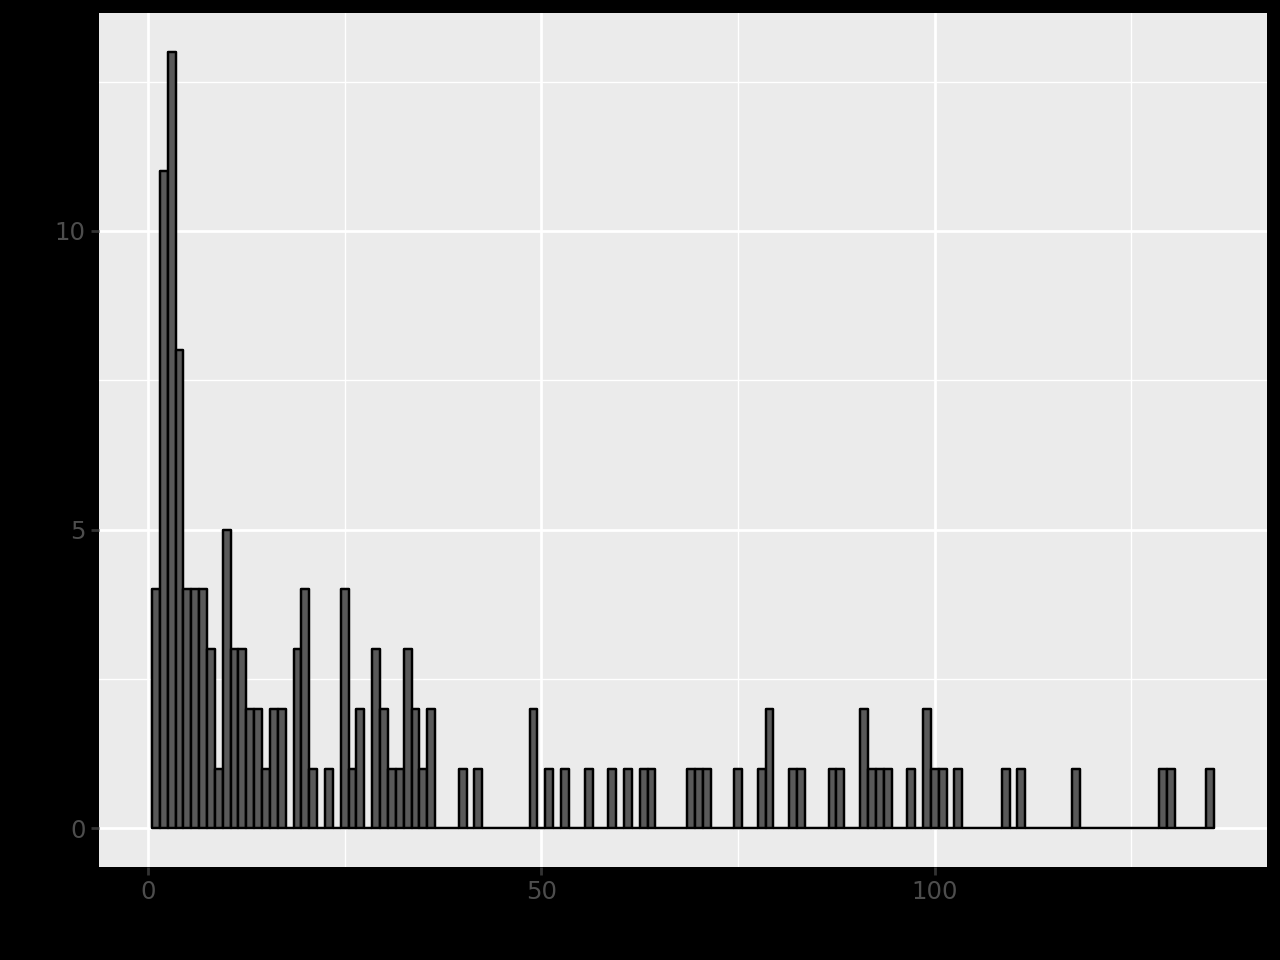

In [47]:
gapminder_data = gapminder
gapminder_data["dollars_per_day"] = gapminder_data["gdpPercap"]/365
gapminder_data = gapminder_data[gapminder_data["year"] == 2007]
gapminder_plot = ggplot(gapminder_data, aes(gapminder_data["dollars_per_day"]))
gapminder_plot += geom_histogram(binwidth=1,color = "black")
gapminder_plot

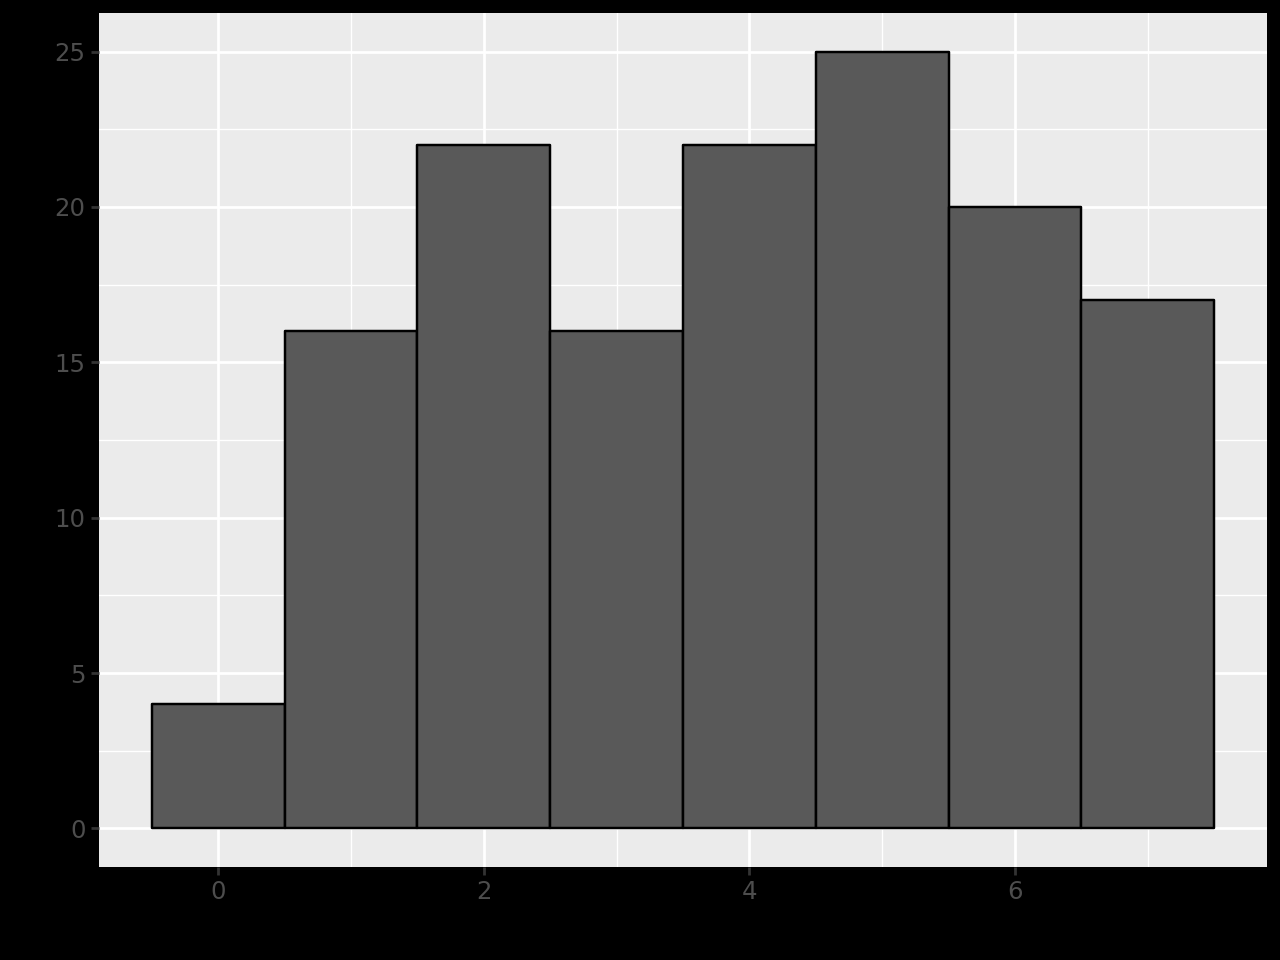

In [51]:
gapminder_data = gapminder
gapminder_data["dollars_per_day"] = gapminder_data["gdpPercap"]/365
gapminder_data = gapminder_data[gapminder_data["year"] == 2007]
gapminder_plot = ggplot(gapminder_data, aes("np.log2(dollars_per_day)"))
gapminder_plot += geom_histogram(binwidth=1,color = "black")
gapminder_plot

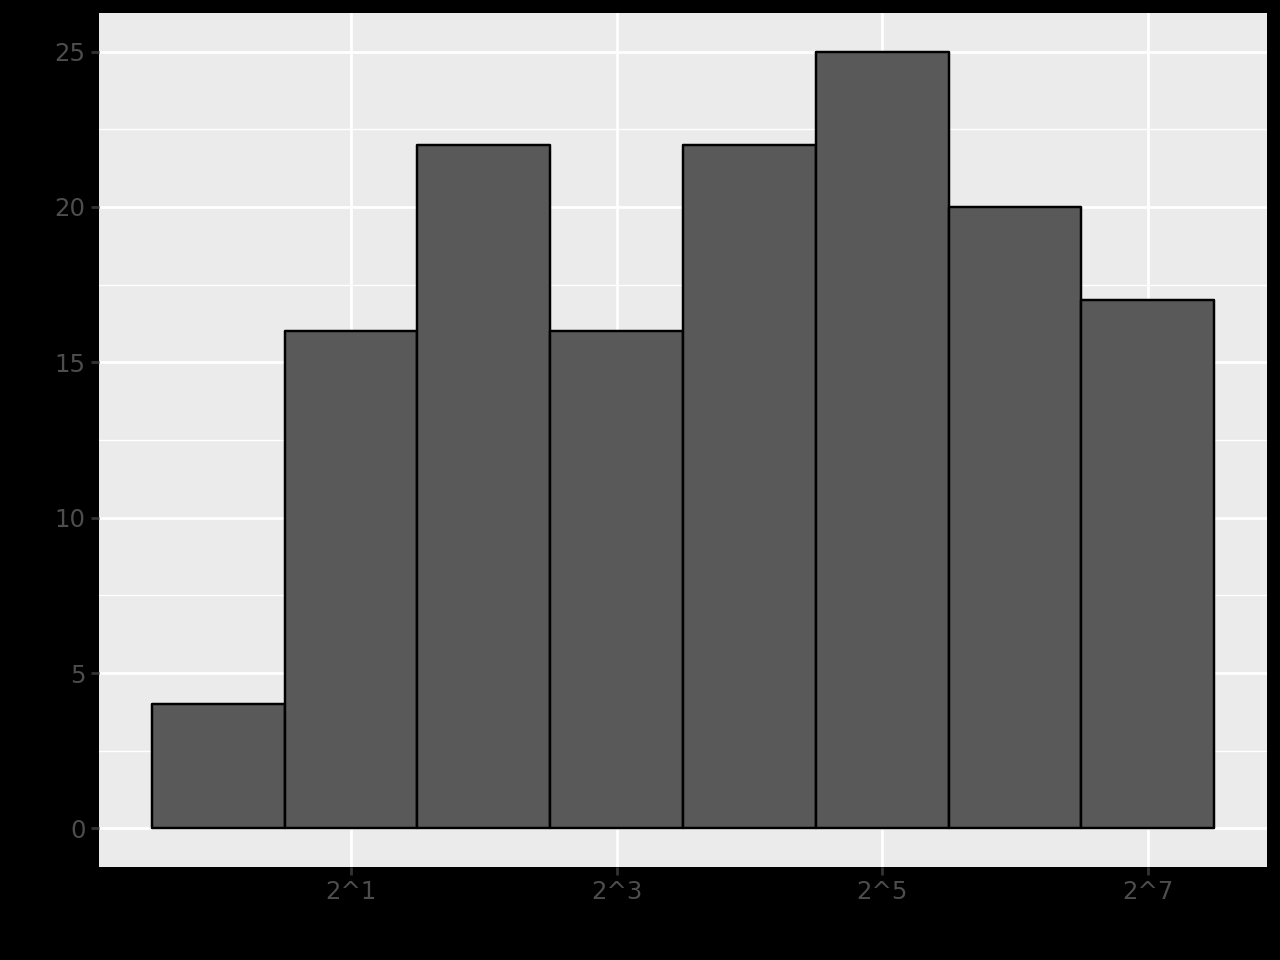

In [53]:
gapminder_data = gapminder
gapminder_data["dollars_per_day"] = gapminder_data["gdpPercap"]/365
gapminder_data = gapminder_data[gapminder_data["year"] == 2007]
gapminder_plot = ggplot(gapminder_data, aes(gapminder_data["dollars_per_day"]))
gapminder_plot += geom_histogram(binwidth=1,color = "black")
gapminder_plot += scale_x_continuous(trans = "log2")
gapminder_plot

/tmp/ipykernel_58064/899437614.py:3: FutureWarning: The provided callable <function median at 0x721c80ef1630> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.


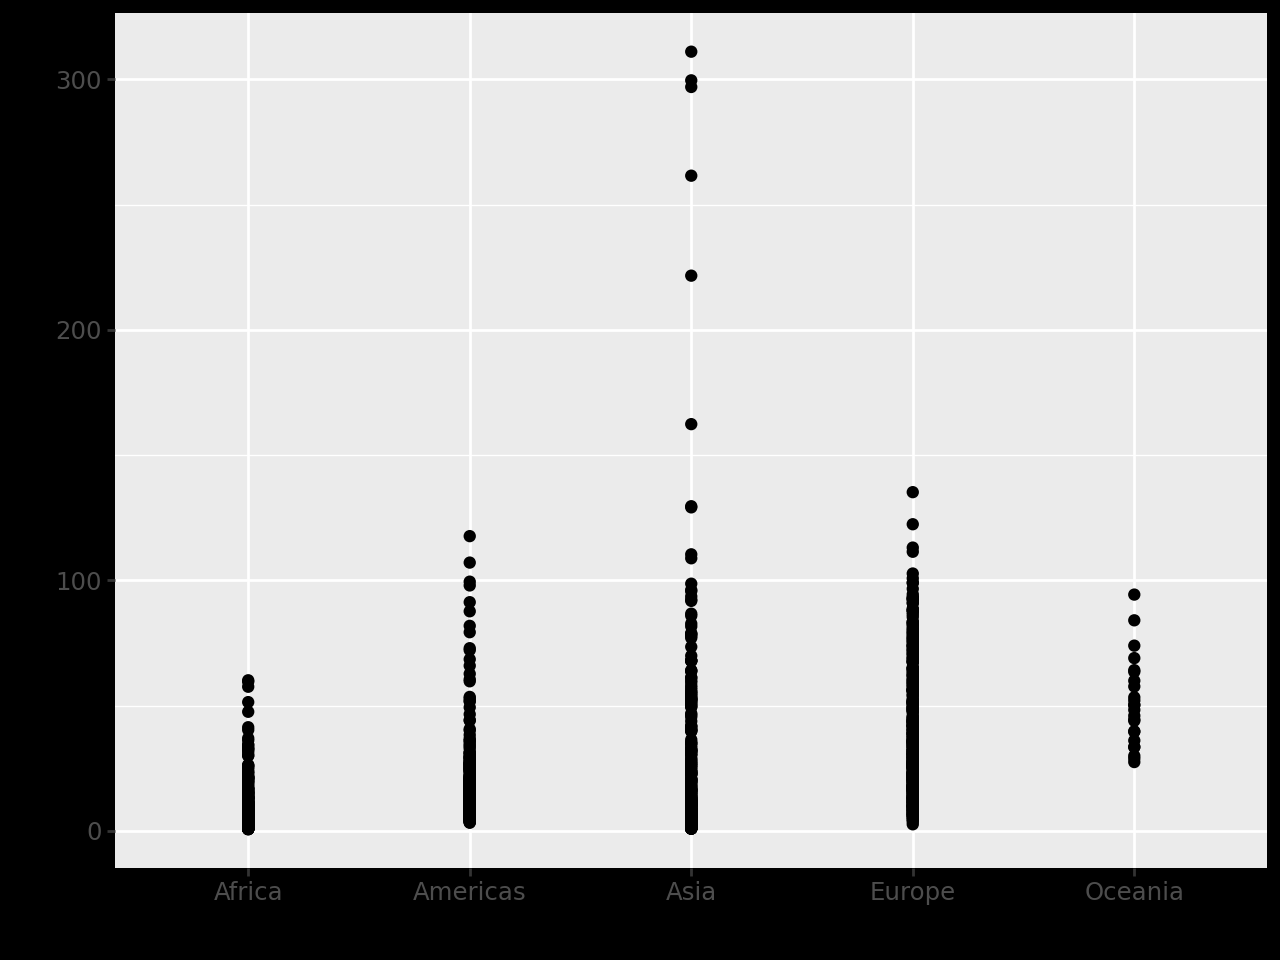

In [81]:
gapminder_data = gapminder
grouped = gapminder_data.groupby("continent")
medians = grouped["dollars_per_day"].transform(np.median)
sorted_order = medians.sort_values(ascending=False).index
gapminder_data = gapminder_data.loc[sorted_order]

gapminder_plot = ggplot(gapminder_data, aes(y = "dollars_per_day", x="continent"))
gapminder_plot += geom_point()
# gapminder_plot += scale_x_continuous(trans = "log2")
gapminder_plot

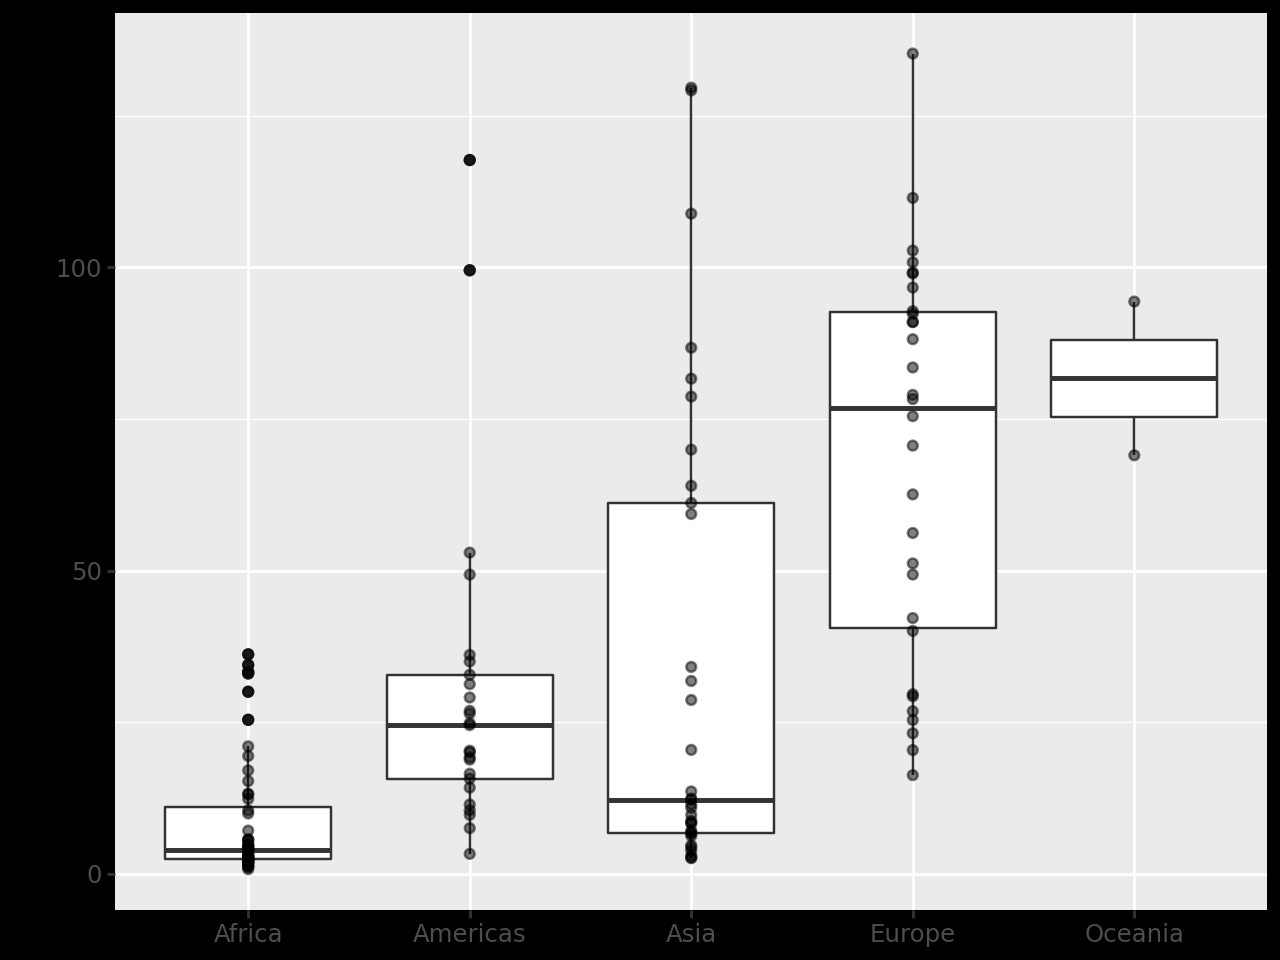

In [121]:
gapminder_data = gapminder
gapminder_data = gapminder_data[gapminder_data["year"] == 2007]
gapminder_plot = ggplot(gapminder_data, aes("continent","dollars_per_day"))
gapminder_plot += geom_boxplot() 
# gapminder_plot += scale_x_continuous(trans = "log2")
gapminder_plot += xlab("")
# gapminder_plot += theme(axis.text.x = element_text(angle = 90, hjust = 1)) 
gapminder_plot += geom_point(alpha = 0.5)
plot4= gapminder_plot
gapminder_plot

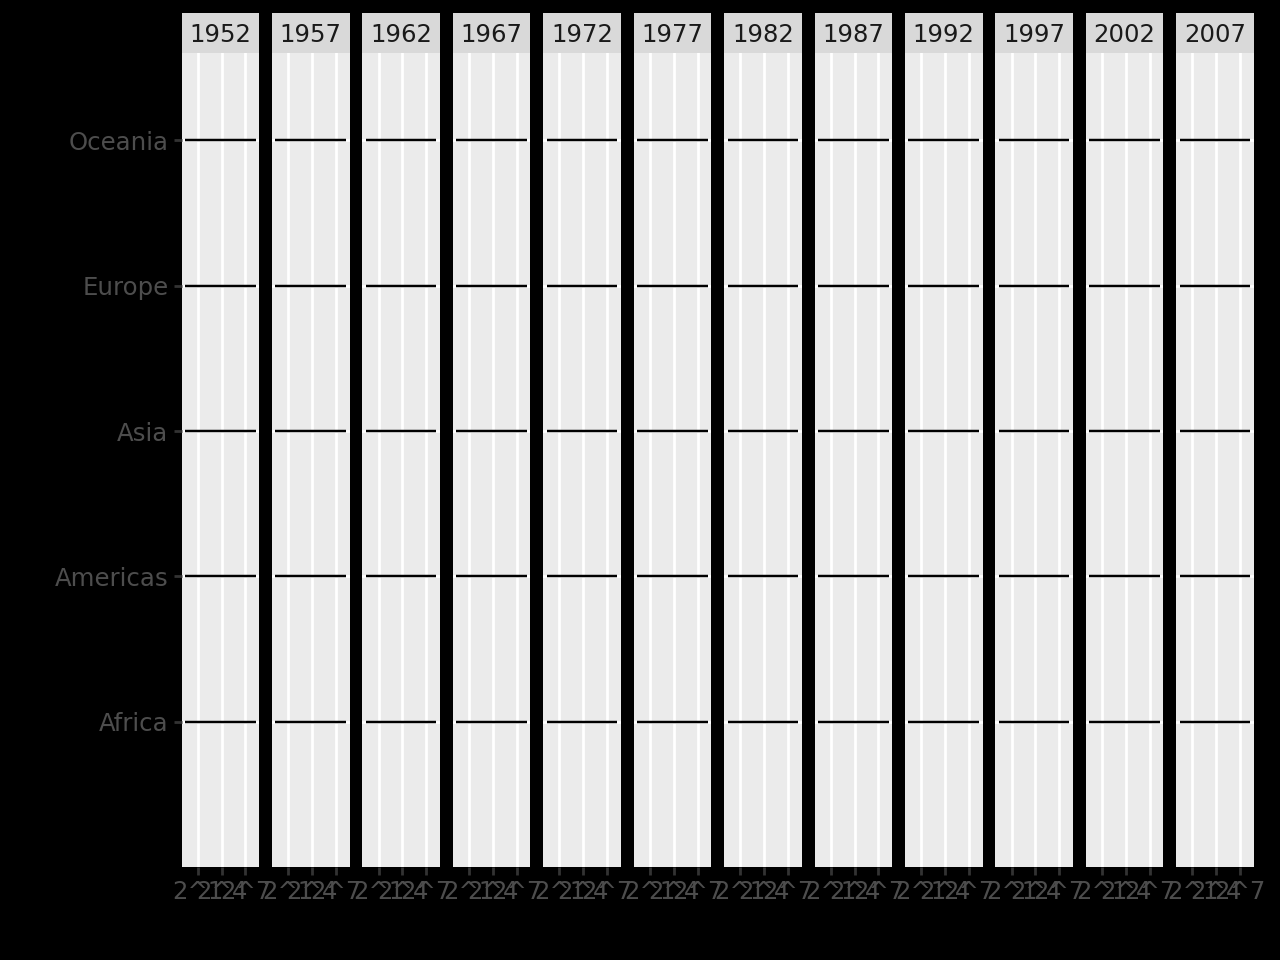

In [120]:
gapminder_data = gapminder
# gapminder_data = gapminder_data[gapminder_data["year"] == 2007]
gapminder_plot = ggplot(gapminder_data, aes("dollars_per_day", "continent"))
gapminder_plot += scale_x_continuous(trans = "log2") 
gapminder_plot += geom_density()
gapminder_plot += facet_grid("~year")

gapminder_plot

# Exercício 3

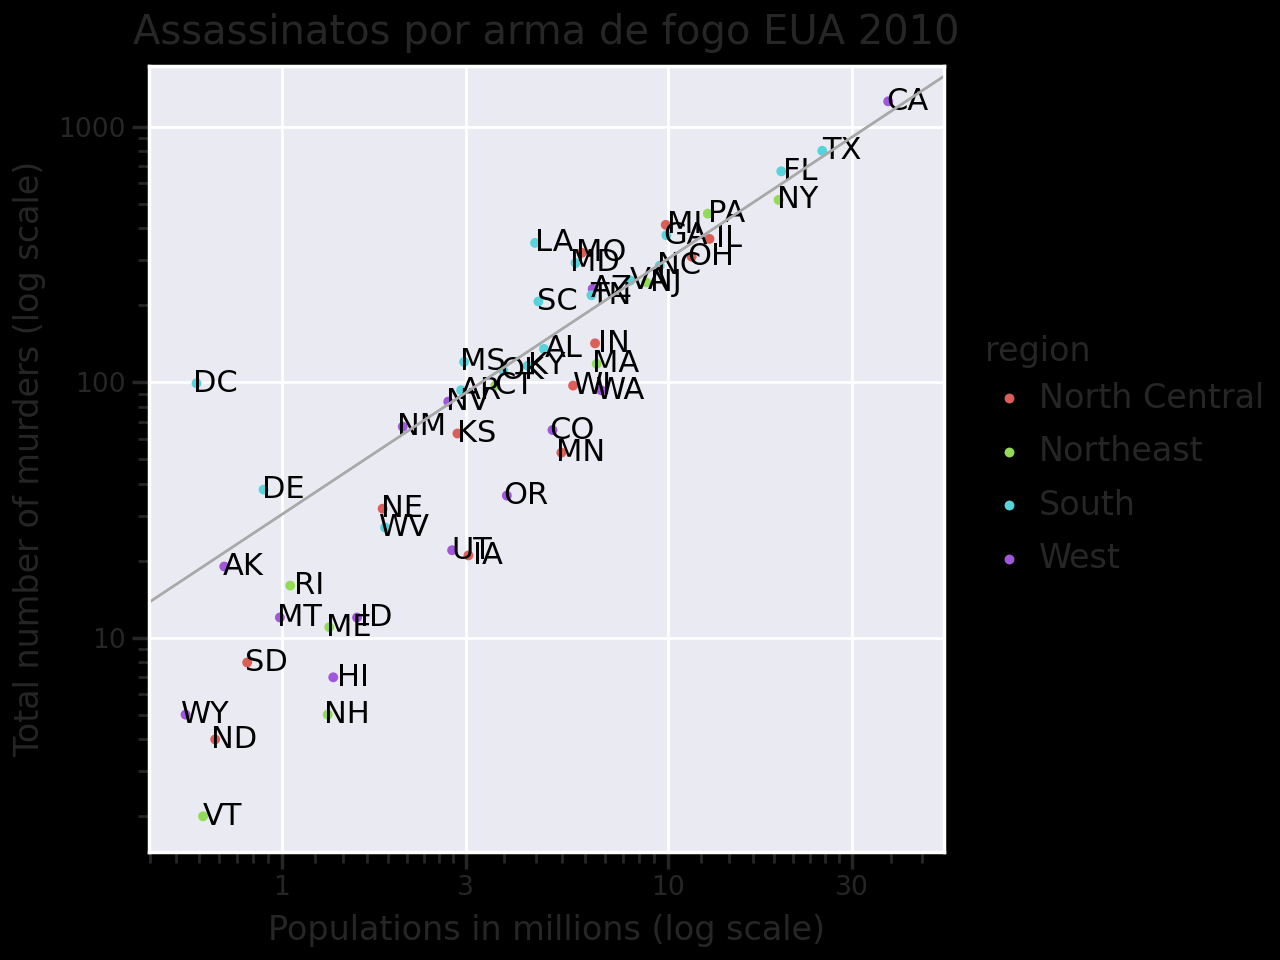

In [109]:
plot1+= ggtitle("Assassinatos por arma de fogo EUA 2010")
plot1

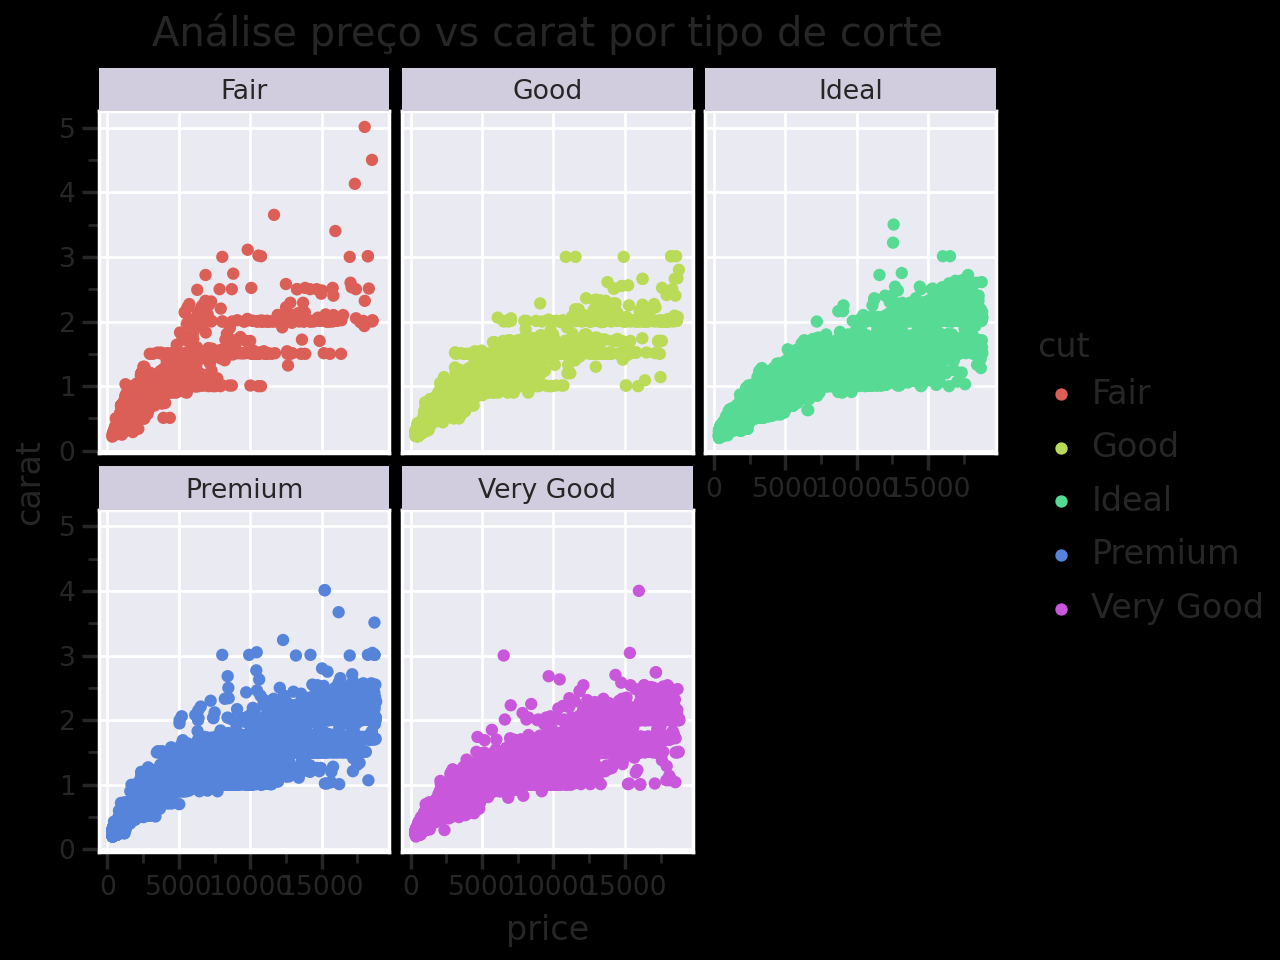

In [112]:
plot2+= ggtitle("Análise preço vs carat por tipo de corte")
plot2

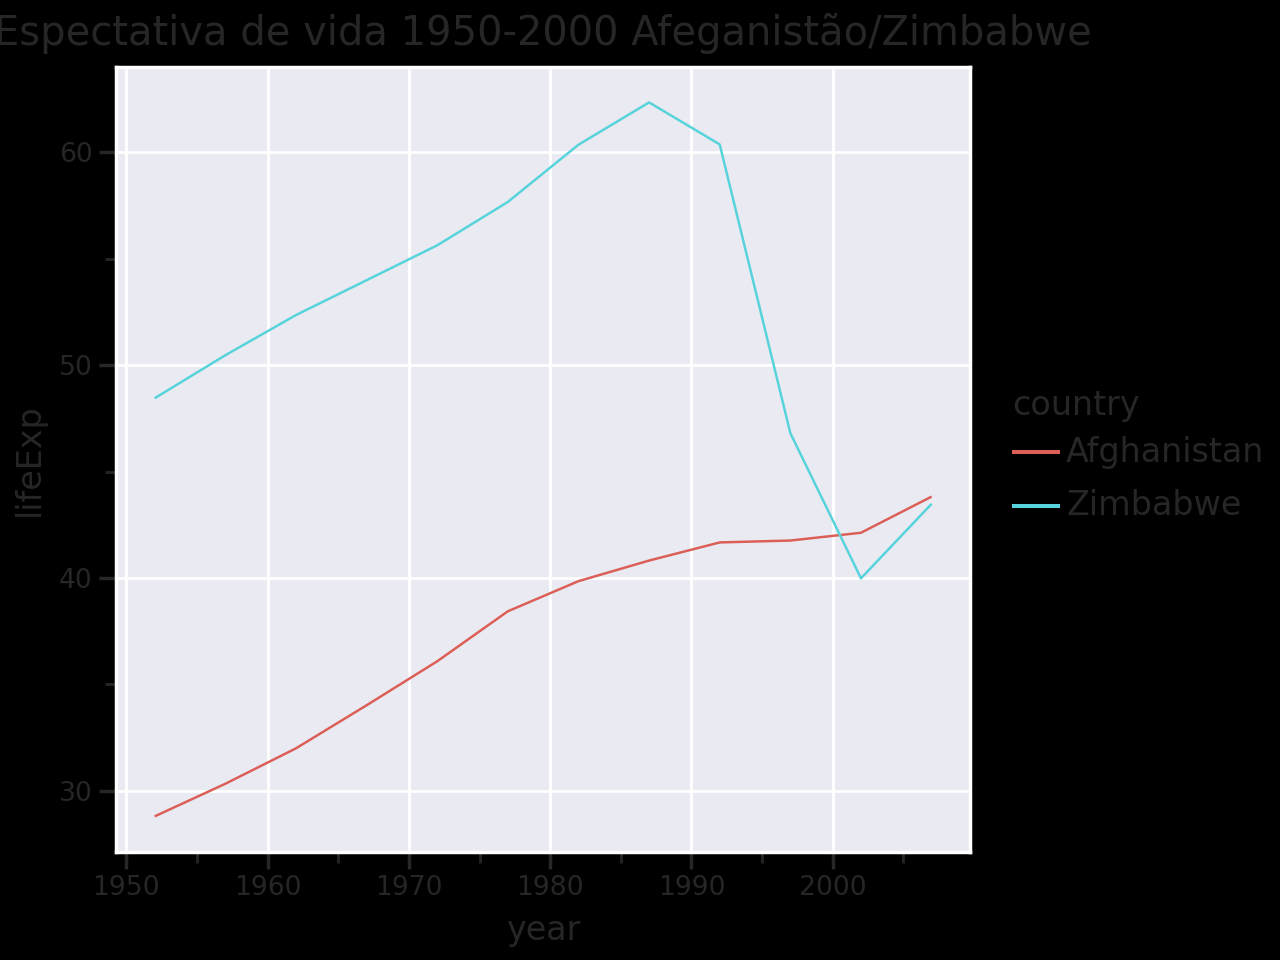

In [118]:
plot3+= ggtitle("Espectativa de vida 1950-2000 Afeganistão/Zimbabwe")
plot3 += theme_seaborn()
plot3

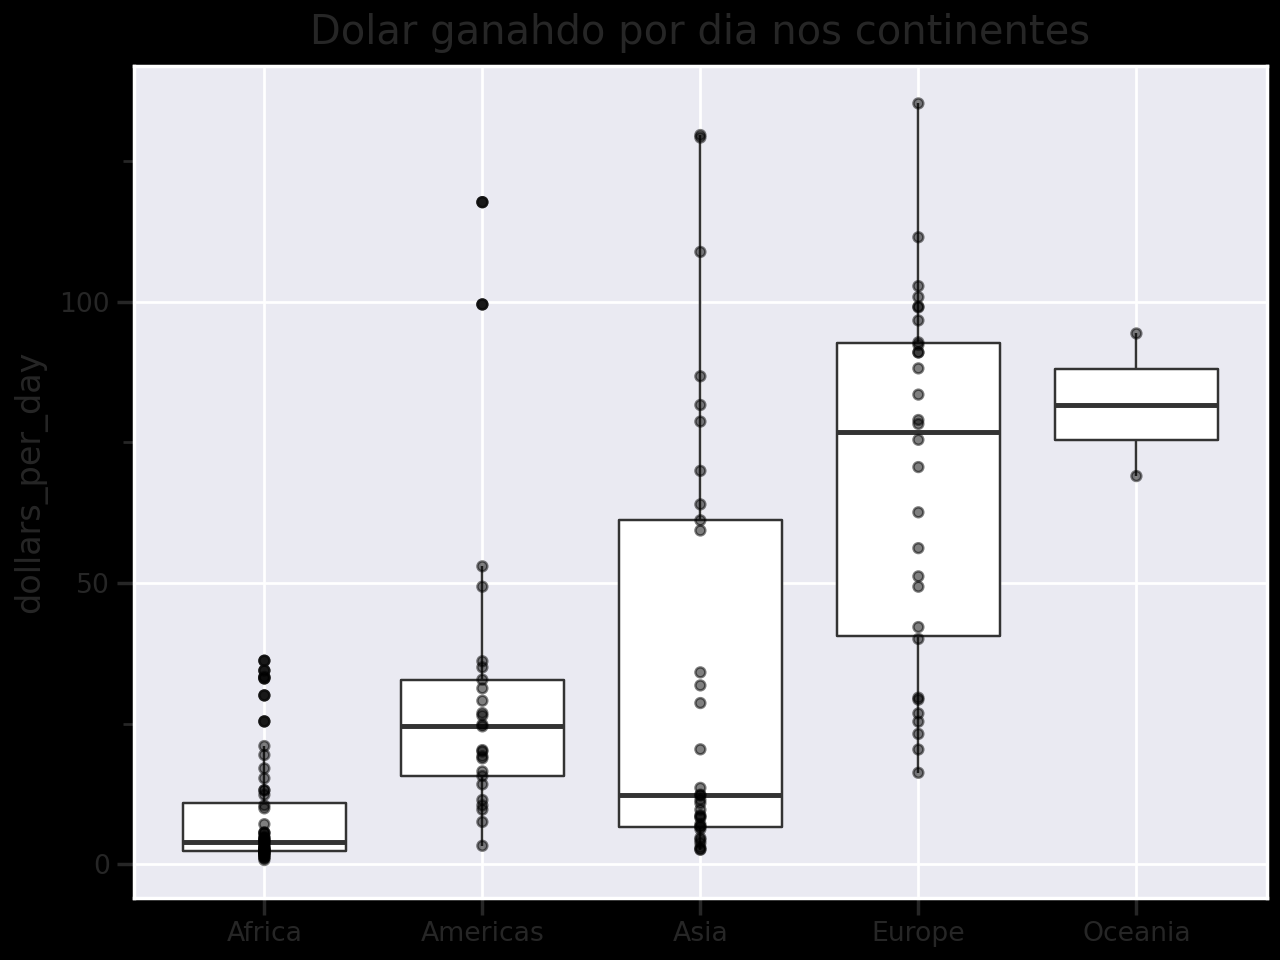

In [125]:
plot4+= ggtitle("Dolar ganahdo por dia nos continentes")
plot4 += theme_seaborn()
plot4